In [1]:
# Import necessary modules
#import geopandas as gpd
#import geocube    
#from mpl_toolkits.basemap import Basemap
#from matplotlib import pyplot as plt
import rasterio

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature  
from matplotlib import pyplot
#import rasterstats
import regionmask
import xarray as xr
import xesmf as xe

import geopandas as gpd
#import rioxarray

#import rasterstats as rs

import numpy as np

In [2]:
data_ts = xr.open_dataset('ScenarioMIP.NCAR.CESM2.ssp585.day.gn.95_99.nc')
data_ts 

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, time: 1825)
Coordinates:
  * time     (time) object 2095-01-01 00:00:00 ... 2099-12-31 00:00:00
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
Data variables:
    mrro     (time, lat, lon) float64 ...

In [3]:
year_global_mean = data_ts .groupby('time.year').mean()
year_global_mean

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, year: 5)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * year     (year) int64 2095 2096 2097 2098 2099
Data variables:
    mrro     (year, lat, lon) float64 1.006e-18 -2.159e-19 4.871e-19 ... nan nan

In [20]:
global_mean = year_global_mean.mean(dim = 'year')

In [21]:
global_mean

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    mrro     (lat, lon) float64 -7.374e-19 2.286e-19 -4.988e-20 ... nan nan nan

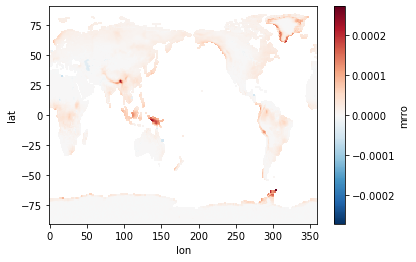

In [22]:
global_mean.mrro.plot()

In [59]:
a = global_mean.assign_coords({'year': 2000})
a1 = a.expand_dims('year')
a1

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, year: 1)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * year     (year) int64 2000
Data variables:
    mrro     (year, lat, lon) float64 -7.374e-19 2.286e-19 ... nan nan

In [65]:
test = xr.concat([year_global_mean, a1], 'year')
test

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, year: 6)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * year     (year) int64 2095 2096 2097 2098 2099 2000
Data variables:
    mrro     (year, lat, lon) float64 1.006e-18 -2.159e-19 4.871e-19 ... nan nan

In [63]:
test_rank = test.rank(dim = 'year')

In [66]:
test_rank

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, year: 6)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * year     (year) int64 2095 2096 2097 2098 2099 2000
Data variables:
    mrro     (year, lat, lon) float64 6.0 1.0 5.0 4.0 5.0 ... nan nan nan nan

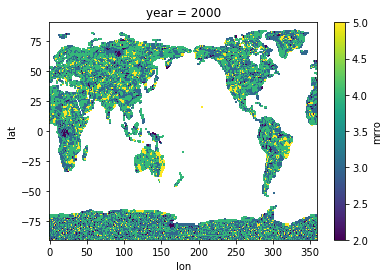

In [68]:
test_rank.sel(year=2000).mrro.plot()